In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('salary_preprocessed.csv')

In [3]:
df

,Age,Years of Experience,Salary,Gender_Male,Education Level_Master's,Education Level_PhD,Experience Level_Mid,Experience Level_Senior,Job Title
0,32,5,90000,1,0,0,1,0,159
1,28,3,65000,0,1,0,0,0,17
2,45,15,150000,1,0,1,0,1,130
3,36,7,60000,0,0,0,1,0,101
4,52,20,200000,1,1,0,0,1,22
...,...,...,...,...,...,...,...,...,...
413,43,18,170000,1,1,0,0,1,29
414,43,3,50000,0,0,0,0,0,38
415,43,14,150000,1,0,0,0,1,141
416,43,16,160000,0,0,1,0,1,114


In [4]:
## Indepedent and Dependent Feature
X = df.drop('Salary',axis=1)
X.head()

,Age,Years of Experience,Gender_Male,Education Level_Master's,Education Level_PhD,Experience Level_Mid,Experience Level_Senior,Job Title
0,32,5,1,0,0,1,0,159
1,28,3,0,1,0,0,0,17
2,45,15,1,0,1,0,1,130
3,36,7,0,0,0,1,0,101
4,52,20,1,1,0,0,1,22


In [5]:
y = df['Salary']
y.head()

0     90000
1     65000
2    150000
3     60000
4    200000
Name: Salary, dtype: int64

### Feature Selection 

- Just testing with the features not applying in model for prediction because we have only few features
- Its applicable for large number of features present in the dataset

In [6]:
# Now understand about feature importance which feature is highly important

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

In [7]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [8]:
# Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

In [9]:
grid_search.fit(X,y)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
309 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_pa

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [10]:
# Access the best model
best_model_feature = grid_search.best_estimator_

In [11]:
best_model_feature.feature_importances_

array([0.19884209, 0.25915101, 0.01826797, 0.06516144, 0.09054209,
       0.03162079, 0.2649545 , 0.0714601 ])

In [12]:
# Plot the graph

feat_importances = pd.Series(best_model_feature.feature_importances_,index=X.columns)
feat_importances

Age                         0.198842
Years of Experience         0.259151
Gender_Male                 0.018268
Education Level_Master's    0.065161
Education Level_PhD         0.090542
Experience Level_Mid        0.031621
Experience Level_Senior     0.264955
Job Title                   0.071460
dtype: float64

In [13]:
feat_importances.nlargest(5)

Experience Level_Senior    0.264955
Years of Experience        0.259151
Age                        0.198842
Education Level_PhD        0.090542
Job Title                  0.071460
dtype: float64

<Axes: >

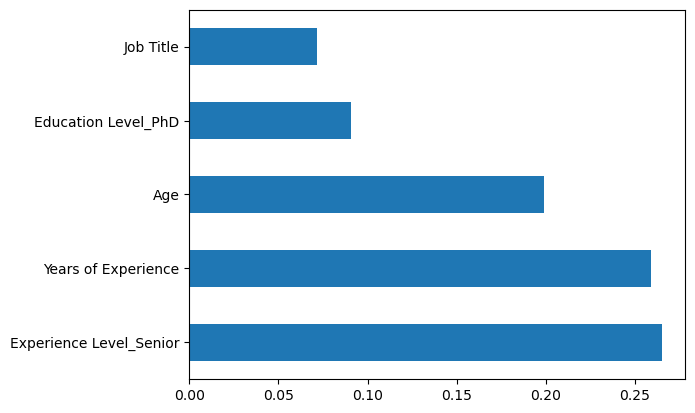

In [14]:
feat_importances.nlargest(5).plot(kind="barh")

### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(X_train.shape)
print(y_train.shape)

(334, 8)
(334,)


In [17]:
print(X_test.shape)
print(y_test.shape)

(84, 8)
(84,)


### Applying Model

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [19]:
### Hyperparameter Tuning

n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [20]:
## Samething for all

# No of trees
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

# No of features consider for every split
max_features = ['auto','sqrt']

# Maximum no of levels in tree
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]

# Minumum no of samples required to split a node
min_samples_split = [2,5,10,15,30]

# Minumum no of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [21]:
# Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

In [22]:
random_grid  = {
    'n_estimators': n_estimators,
    'max_features':max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 30], 'min_samples_leaf': [1, 2, 5, 10]}


In [23]:
# Initialize RandomizedSearchCV
rf_model_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=random_grid,
    scoring='neg_mean_squared_error',
    n_iter=10,  # Number of parameter settings sampled
    cv=5,       # Number of cross-validation folds
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [24]:
# Fit RandomizedSearchCV
rf_model_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_paramet

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 30],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

### Avoiding Hyperparameter errors by giving crct value after applying in small data samples

In [25]:
# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Define a parameter grid for RandomizedSearchCV
random_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_features': ['sqrt', 'log2', None],  # Fixed values
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
rf_model_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=random_grid,
    scoring='neg_mean_squared_error',
    n_iter=10,  # Number of parameter settings sampled
    cv=5,       # Number of cross-validation folds
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
rf_model_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [26]:
y_pred = rf_model_random_search.predict(X_test)
y_pred

array([176918.31507123, 145179.01768561,  88463.59719529,  52964.29104478,
        40381.37264476, 170262.37401408, 156285.18832053,  49918.71951085,
        37965.98802937, 148248.67427902, 120315.07374941, 122860.63664596,
       113353.88069358,  72903.43235676, 169342.1020459 , 139703.49265508,
        88463.59719529,  50327.62437811,  85851.08190523,  91490.85910005,
        68385.05484028, 178754.74856605,  90175.02736337, 105122.29102019,
       158140.26768561,  91253.60595525,  49531.79104478, 105454.41989924,
        68385.05484028, 160690.45054039, 149978.98410808,  60046.2448113 ,
       113232.60093168, 159341.52196896, 120448.06958801, 129202.89855072,
        50241.23548922, 158012.56927291, 171797.5461851 ,  98573.38393459,
        85086.34049468,  76899.60051686, 123477.95054039,  40135.95771144,
        52069.10412624,  49758.45771144, 122860.63664596, 125151.68709953,
        95086.52262192,  85361.21624291,  68998.08194767, 138955.15932175,
       158012.56927291,  

In [27]:
rf_model_random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

<Axes: xlabel='Salary', ylabel='Count'>

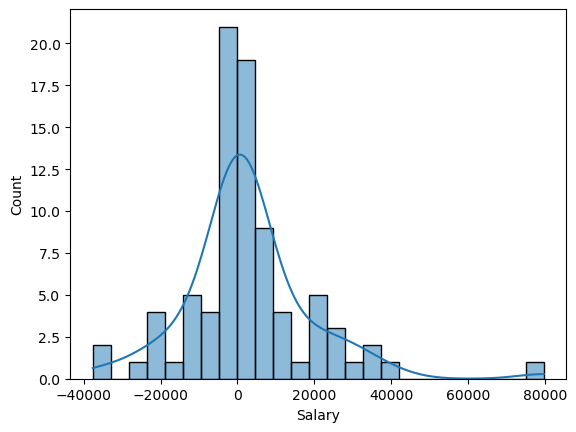

In [28]:
# Plot for Accuracy
import seaborn as sns
sns.histplot(y_test-y_pred,kde=True)

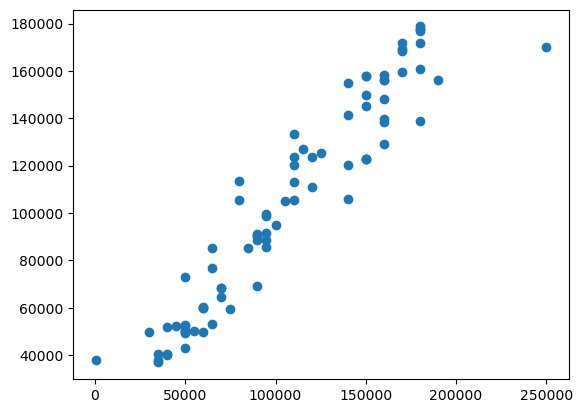

In [29]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("RMSE:",rmse)

Mean Squared Error (MSE): 275282011.0468442
R² Score: 0.8951454784526234
RMSE: 16591.624725952675


In [35]:
import pickle
from sklearn.ensemble import RandomForestRegressor


# Save the model using pickle
with open('salary_prediction_model.pkl', 'wb') as file:
    pickle.dump(rf_model_random_search, file)